# Microéconomie 5
## TD1 : Répartition optimale des ressources

### Exercice 2 : Préférences quasi-linéaires

À titre d'ilustration, prenons par exemple les dotations $\omega_1 = 6$ et $\omega_2 = 4$. Les agents ont les préférences

\begin{aligned}
    U^A(x^A) &= \ln (x_1^A) + x_2^A \\
    U^B(x^B) &= 2 \ln (x_1^B) + x_2^B
\end{aligned}
    
Commençons encore par coder les données du problème.

**Vous pouvez modifier librement les dotations $\omega_1$ et $\omega_2$ pour voir comment cela affecte les résultats.**

In [ ]:
omega1 <- 6                                 # dotation totale en bien 1
omega2 <- 4                                 # dotation totale en bien 2
UA <- function(x1, x2) log(x1) + x2         # fonction d'utilité de A
UB <- function(x1, x2) 2*log(x1) + x2       # fonction d'utilité de B

Je définis de nouveau `x1`, une série de valeurs de $x_1$ qui va me servir à tracer les courbes.

In [ ]:
x1 <- seq(0, omega1, length=1000)

Pour tracer la carte d'indifférence des agents, j'utilise les expressions données par
\begin{aligned}
    U^A(x^A) = U_0 &\iff x_2^A = U_0 - \ln(x_1^A) \\
    U^B(x^B) = U_0 &\iff x_2^B = U_0 - 2 \ln(x_1^B)
\end{aligned}
pour définir deux fonctions `indiffA` et `indiffB` qui prennent en argument un niveau d'utilité `U` et qui renvoient les points de la courbe d'indifférence correspondant à ce niveau d'utilité.

In [3]:
indiffA <- function(U) U - log(x1)
indiffB <- function(U) U - 2*log(x1)

Je trace ensuite les courbes d'indifférence pour des niveaux d'utilité bien choisis : celles de $A$ en bleu et celles de $B$ en orange.

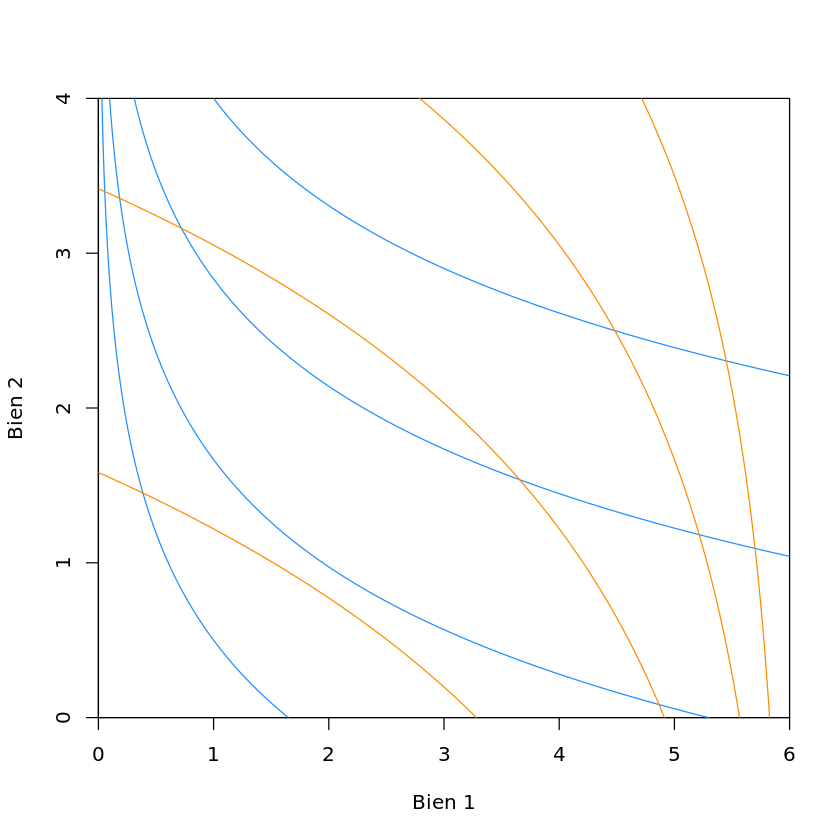

In [4]:
niveauxA <- seq(.5, 4, len = 4)
niveauxB <- seq(.5, 6, len = 4)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, omega2))                # CI de A
for (U in niveauxB) lines(x1, rev(omega2 - indiffB(U)), col = "darkorange", ylim = c(0, omega2))  # CI de B

On remarque que les courbes d'indifférence sont toutes convexes : **les préférences sont donc convexes**.

On cherche ensuite les optima de Pareto _internes_ : pour cela, il faut par exemple résoudre le programme

\begin{equation}
    \max_{x^A, x^B} \; U^A(x^A) \qquad
        \text{s.c.} \; \begin{cases}
        U^B(x^B) \geq \underline U^B \\
        x_1^A + x_1^B \leq \omega_1 \\
        x_2^A + x_2^B \leq \omega_2 \\
        x_i^k > 0 \; (\forall i \in \{1, 2\}, k \in \{A, B\}).
        \end{cases}
\end{equation}

Le lagrangien associé à ce problème est

\begin{equation}
    \mathcal L (x^A, x^B, \lambda, \mu_1, \mu_2) = \ln(x_1^A) + x_2^A + \lambda (2\ln(x_1^B) + x_2^B - \underline U^B) + \mu_1 (\omega_1 - x_1^A - x_1^B) + \mu_2 (\omega_2 - x_2^A - x_2^B).
\end{equation}

On en déduit les conditions du premier ordre par rapport aux sept variables $x_1^A$, $x_2^A$, $x_1^B$, $x_2^B$, $\lambda$, $\mu_1$, et $\mu_2$,

\begin{aligned}
    &\frac{1}{x_1^A} - \mu_1 = 0 \\
    &1 - \mu_2 = 0 \\
    &\lambda \frac{2}{x_1^B} - \mu_1 = 0 \\
    &\lambda - \mu_2 = 0 \\
    &U^B(x^B) = \underline U^B \\
    &x_1^A + x_1^B = \omega_1 \\
    &x_2^A + x_2^B = \omega_2.
\end{aligned}

Une combinaison adéquate de ces équations fournit

\begin{equation}
    \underbrace{\frac{1}{x_1^A}}_{= \mathsf{TMS}^A} = \frac{\mu_1}{\mu_2} = \underbrace{\frac{2}{x_1^B}}_{= \mathsf{TMS}^B} = \frac{2}{\omega_1 - x_1^A}.
\end{equation}

Les optima intérieurs correspondent donc a une unique valeur de $x_1^A$, donnée par

\begin{equation}
    x_1^A = \frac{\omega_1}{3} \overset{\text{A.N.}}{=} 2.
\end{equation}

Dans la boîte d'Edgeworth il s'agit donc d'un segment vertical. Je le trace ci-dessous (en violet) avec quelques courbes d'indifférence.

In [ ]:
allocA2 <- seq(0, 1, len=9)*omega2               # allocations en bien 2 de A pour les courbes d'indifférence

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
for (i in 1:length(allocA2)) {                   # courbes d'indifférence tangentes
    xA1 <- omega1/3
    xA2 <- allocA2[i]
    lines(x1, indiffA(UA(xA1, xA2)), col = "dodgerblue", ylim = c(0, omega2))
    lines(x1, rev(omega2 - indiffB(UB(omega1 - xA1, omega2 - xA2))), col = "darkorange", ylim = c(0, omega2))
}
lines(c(omega1/3, omega1/3), c(0, omega2), lwd = 2, col = "purple")   # optima intérieurs

On s'intéresse enfin aux allocations acceptées dans la négociation. À partir d'une allocation initiale $I$, une allocation est acceptée par $A$ si et seulement si elle est optimale **et** se situe au-dessus de sa courbe d'indifférence passant par $I$.

Représentons dans un premier temps l'ensemble des allocations acceptées par $A$ (en pointillés bleus).

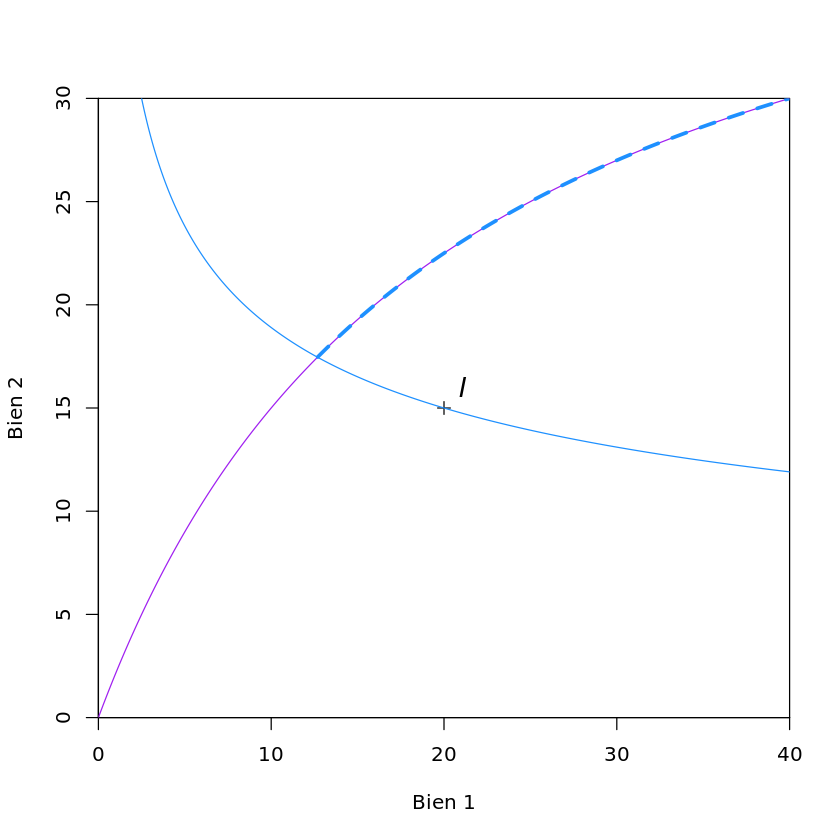

In [13]:
I <- c(20, 15)

# Allocations acceptées par A

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+1, I[2]+1, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))  # courbe d'indifférence de A
XA <- x1[UA(x1, optima(x1)) > UA(I[1], I[2])]
lines(XA, optima(XA), col = "dodgerblue", lwd = 3, lty = 2)                  # allocations acceptées par A

De manière similaire, les allocations acceptées par $B$ doivent être à la fois optimales **et** en dessous de la courbe d'indifférence de $B$ passant par $I$.

On les représente ici l'ensemble des allocations acceptées par $B$ (en pointillés oranges).

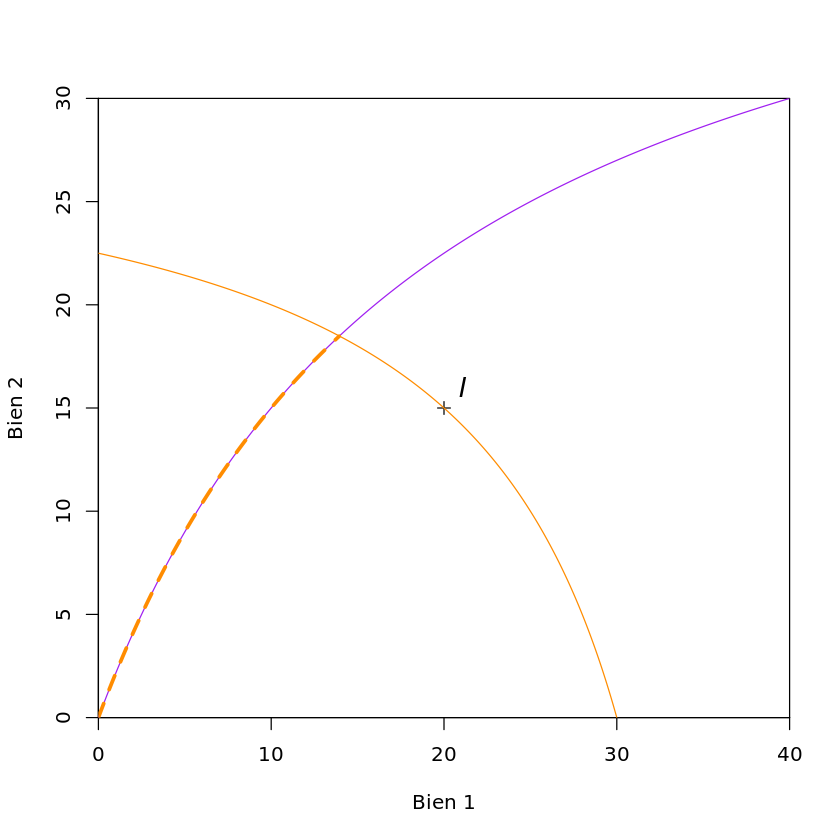

In [14]:
# Allocations acceptées par B

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+1, I[2]+1, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # CI B
XB <- x1[UB(omega1 - x1, omega2 - optima(x1)) > UB(omega1 - I[1], omega2 - I[2])]
lines(XB, optima(XB), col = "darkorange", lwd = 3, lty = 2)                  # allocations acceptées par B

Les allocations qui sont acceptées par **les deux** agents sont dont les allocations optimales se situant **entre** leurs deux courbes d'indifférence passant par $I$ : c'est le _coeur de l'économie_.

On le représente ici avec un trait noir.

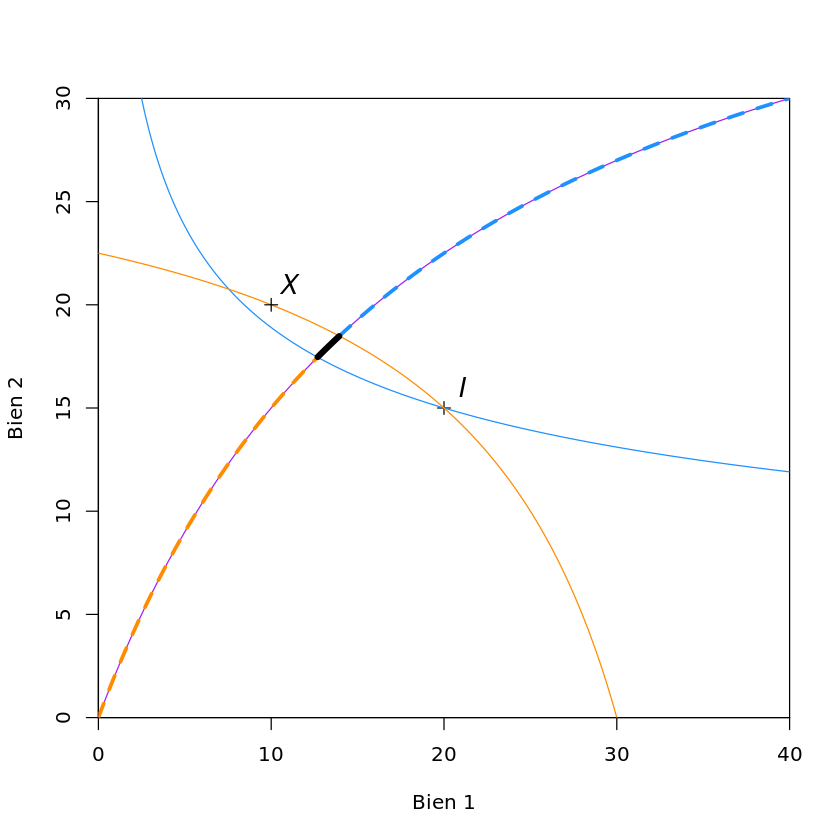

In [23]:
# Allocations acceptées par A

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+1, I[2]+1, labels = "I", cex = 1.3, font = 3)
lines(x1, optima(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))  # courbe d'indifférence de A
lines(XA, optima(XA), col = "dodgerblue", lwd = 3, lty = 2)                  # allocations acceptées par A

# Allocations acceptées par B

lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # CI B
lines(XB, optima(XB), col = "darkorange", lwd = 3, lty = 2)                  # allocations acceptées par B

# Allocations acceptées par A et B
XAB <- intersect(XA, XB)
lines(XAB, optima(XAB), col = "black", lwd = 5)

# Allocation X

X <- c(10, 20)

points(X[1], X[2], pch = 3)
text(X[1]+1, X[2]+1, labels = "X", cex = 1.3, font = 3)

On remarque alors que l'allocation $X = (10, 20; 30, 10)$ n'est acceptée par aucun des agents puisqu'elle n'est pas optimale. 